In [13]:
import os
import json
import re
import sys
import unicodedata
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

import wordcloud

In [14]:
class FileStorage():

    def __init__(self,filename):
        self.filename = filename

    def read(self):
        if os.path.exists(self.filename):
            with open(self.filename) as file:
                data = json.load(file)
                return data
        else:
            return {}
        
    def save(self,data):#write data like json file
        try:
            old_data = self.read()
            if len(old_data.keys()) == 0:
                old_data["tweets"] = []
            old_data["tweets"].append(data)
            jsondata = json.dumps(old_data, indent=4, skipkeys=True, sort_keys=True)
            fd = open(self.filename, 'w')
            fd.write(jsondata)
            fd.close()
            print (self.filename + " ha sido escrito exitosamente")
        except Exception as e:
            print (e)
            print ('ERROR writing', self.filename)


def process(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"(https?)\S+","",tweet)#remove urls
    tweet = re.sub(r"(\B#)\w*","",tweet)#remove hashtags
    tweet = re.sub(r"(\B@)\w*","",tweet)#remove mentions
    tweet = re.sub("\n","",tweet)#remove lines separate
    tweet = unicodedata.normalize('NFKD', tweet).encode('ASCII', 'ignore')#remove accents
    tweet = re.sub('[^a-zA-Z ]+', ' ', tweet.decode('ASCII'))#remove punctuactions
    text_no_stop_words = filter_stop_words(tweet)
    tokens = [token for token in text_no_stop_words if len(token) > 2 ]
    tweet = " ".join(tokens)
    return tweet

def filter_stop_words(text):
    stop_words_list = stopwords.words('spanish')
    stop_words_list += stopwords.words('english')
    text_filtered = [word for word in text.split() if word.lower() not in stop_words_list]
    return text_filtered

In [15]:
file_worker = FileStorage("buenos_aires.json")
data = file_worker.read()
print(data['tweets'][10])

{'contributors': None, 'coordinates': None, 'created_at': 'Sat Nov 28 14:52:09 +0000 2020', 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}, 'favorite_count': 0, 'favorited': False, 'filter_level': 'low', 'geo': None, 'id': 1332698803904913410, 'id_str': '1332698803904913410', 'in_reply_to_screen_name': None, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'is_quote_status': False, 'lang': 'es', 'place': {'attributes': {}, 'bounding_box': {'coordinates': [[[-58.531792, -34.674453], [-58.531792, -34.534177], [-58.353494, -34.534177], [-58.353494, -34.674453]]], 'type': 'Polygon'}, 'country': 'Argentina', 'country_code': 'AR', 'full_name': 'Ciudad Autónoma de Buenos Aires, Argentina', 'id': '018f1cde6bad9747', 'name': 'Ciudad Autónoma de Buenos Aires', 'place_type': 'city', 'url': 'https://api.twitter.com/1.1/geo/id/018f1cde6bad9747.json'}, 'quote_count': 0, 'reply_count': 0, 'ret

In [16]:
tokens = []    
for tweet in data["tweets"]:
    texto = tweet["text"]
    line = "%s\n"%(process(texto))
    tokens += line.split()    
print(tokens)

['pandemia', 'odiotaaaaaaaa', 'brillante', 'kirchnerismo', 'logro', 'objetivo', 'principal', 'quitar', 'copartici', 'llueve', 'juega', 'river', 'viene', 'caso', 'sera', 'finde', 'maravilloso', 'quiero', 'tener', 'alguien', 'haga', 'compania', 'dias', 'lluviosos', 'mira', 'doy', 'target', 'bueno', 'diciendo', 'volvemos', 'distanciamiento', 'obligatorio', 'quizas', 'descendientes', 'vuelvan', 'normalidad', 'quiniela', 'clandestina', 'hija', 'mayor', 'tal', 'debemos', 'desactivar', 'miedos', 'embole', 'obvio', 'hubieramos', 'hecho', 'dias', 'lluvia', 'terriblemente', 'tragicos', 'alguien', 'nas', 'pelotudo', 'brancateli', 'achei', 'achava', 'horrivel', 'amiga', 'maldita', 'cerveza', 'viste', 'personas', 'bien', 'quedan', 'casas', 'llueve', 'bueno', 'menor', 'estudiando', 'griego', 'duolingo', 'griego', 'entendes', 'nunca', 'voy', 'cansar', 'decirlo', 'ser', 'hincha', 'boca', 'mas', 'lindo', 'vida', 'claro', 'corromplible', 'violento', 'especulador', 'denuncien', 'judicial', 'anos', 'claro

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

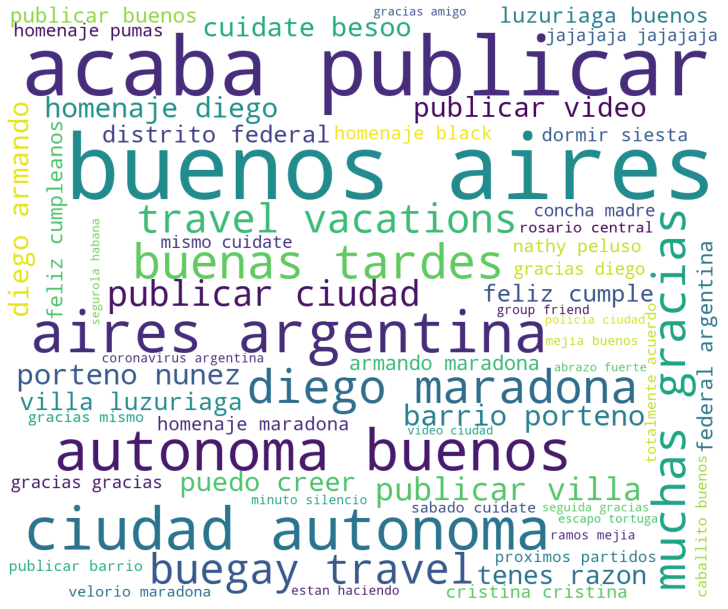

In [23]:
from wordcloud import WordCloud
stop_words_list = stopwords.words('spanish')
special_stopwords = ['buenos', 'aires', 'buenas', 'tardes', 'dias', 'ciudad', 'autonoma', 'buen', 'argentina']
special_stopwords = []
stop_words_list = stop_words_list + special_stopwords
wordcloud = WordCloud(stopwords = stop_words_list,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            collocation_threshold = 2,
                            min_word_length = 5,
                            max_words = 60,
                            collocations=True
                            ).generate(' '.join(tokens))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.title('Términos más frecuentes', fontsize=30)
plt.show() 